In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
data = pd.read_csv('..\data\co-emissions-per-capita new.csv')

# Inspect the first few rows
print("First Few Rows of the Dataset:")
print(data.head()) 

print("Data types of the Dataset:")
print(data.info())

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
C:\Users\VincentOtoo\AppData\Local\Temp\ipykernel_21724\294138456.py:9: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_csv('..\data\co-emissions-per-capita new.csv')


First Few Rows of the Dataset:
                         Entity  Year Annual CO₂ emissions (per capita)
0                        Africa  1750                                 0
1                       Andorra  1750                                 0
2                          Asia  1750                                 0
3  Asia (excl. China and India)  1750                                 0
4                     Australia  1750                                 0
Data types of the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26600 entries, 0 to 26599
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Entity                             26600 non-null  object
 1   Year                               26600 non-null  int64 
 2   Annual CO₂ emissions (per capita)  26600 non-null  object
dtypes: int64(1), object(2)
memory usage: 623.6+ KB
None


In [4]:

#change data type
data['Annual CO₂ emissions (per capita)']= data['Annual CO₂ emissions (per capita)'].str.replace('.', '').astype(float)

#check for missing values
print(data.isnull().sum())

#check for duplicates
print("Number of duplicate:", data.duplicated().sum())

Entity                               0
Year                                 0
Annual CO₂ emissions (per capita)    0
dtype: int64
Number of duplicate: 0


In [5]:
# Get all unique values in the 'Entity' column and print them along with the total count
all_entities = list(data['Entity'].unique())
unique_entity = data['Entity'].unique()
print(unique_entity) 
print("Total count:", len(unique_entity))

['Africa' 'Andorra' 'Asia' 'Asia (excl. China and India)' 'Australia'
 'Bhutan' 'Brunei' "Cote d'Ivoire" 'Europe' 'Europe (excl. EU-27)'
 'Europe (excl. EU-28)' 'European Union (28)' 'Greenland' 'Guinea'
 'High-income countries' 'Low-income countries'
 'Lower-middle-income countries' 'Mauritania' 'North America'
 'North America (excl. USA)' 'Oceania' 'Papua New Guinea' 'Sierra Leone'
 'Singapore' 'United Kingdom' 'Upper-middle-income countries' 'World'
 'Canada' 'European Union (27)' 'Germany' 'Macao' 'Poland' 'Tuvalu'
 'United States' 'Belgium' 'France' 'Austria' 'Norway' 'Armenia' 'Belarus'
 'Estonia' 'Georgia' 'Hungary' 'Kazakhstan' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Moldova' 'Russia' 'Spain' 'Tajikistan' 'Turkmenistan'
 'Ukraine' 'Uzbekistan' 'Sweden' 'Denmark' 'Netherlands' 'Ireland' 'India'
 'Romania' 'Switzerland' 'Azerbaijan' 'Czechia' 'Finland' 'Italy'
 'Slovakia' 'Turkey' 'Greece' 'Japan' 'Portugal' 'New Zealand' 'Bulgaria'
 'Peru' 'South Africa' 'South America' 'Bosnia and 

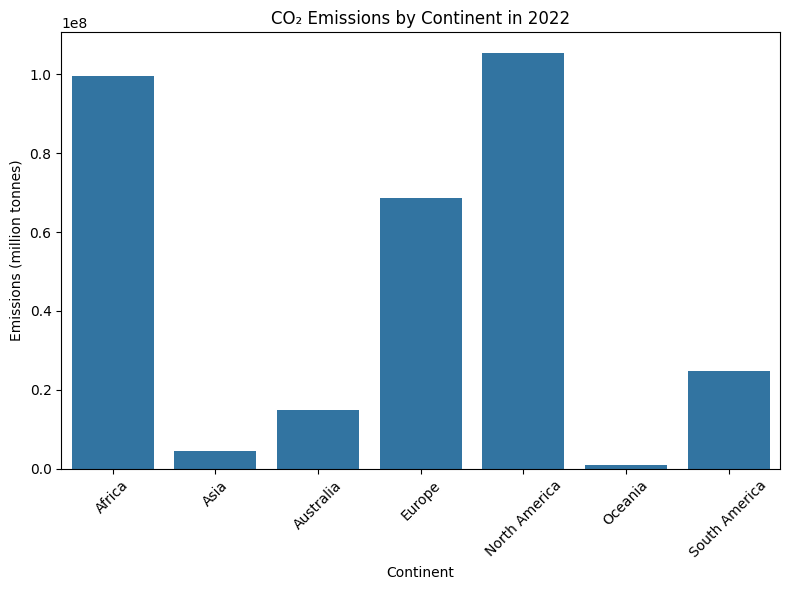

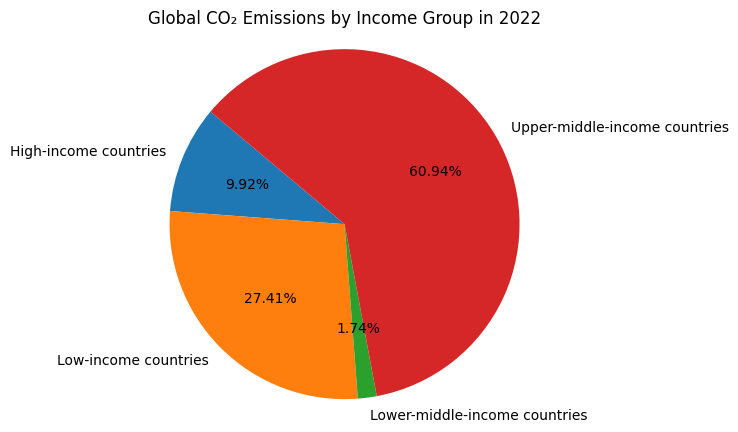

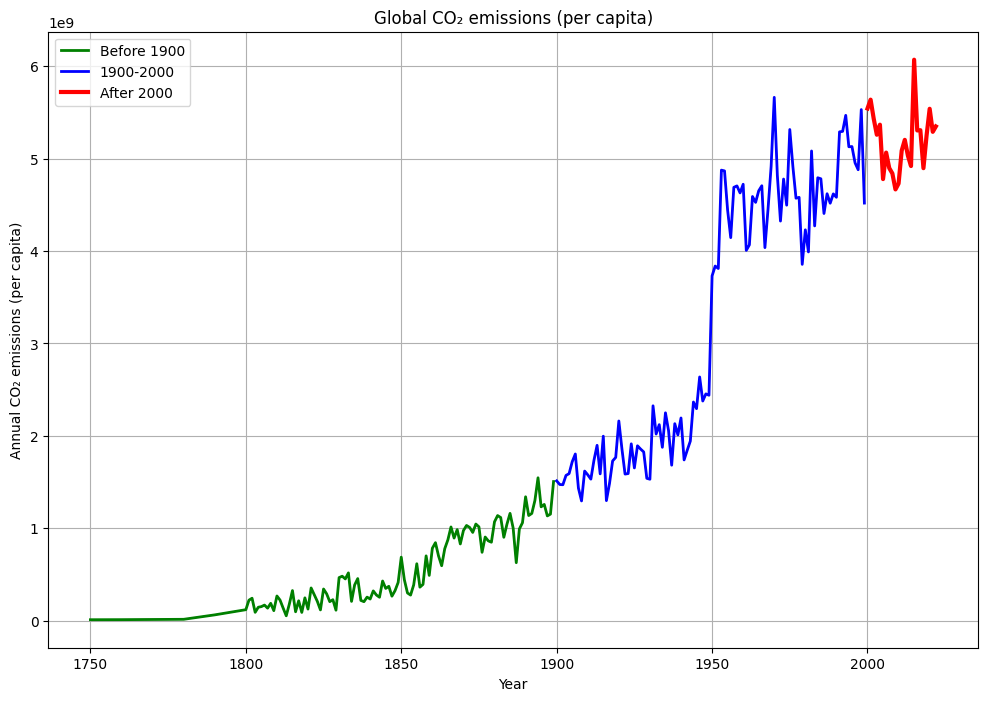

In [6]:
# Categorize entities according to countries, continents, regions, income groups, and the world 
continents = ['Africa','Asia','Europe', 'North America','South America', 'Oceania', 'Australia']
regions =  ['Europe (excl. EU-27)', 'Europe (excl. EU-28)', 'North America (excl. USA)', 
           'Asia (excl. China and India)', 'European Union (28)', 'European Union (27)']
income_groups = ['Low-income countries', 'Lower-middle-income countries', 'Upper-middle-income countries',
                'High-income countries']
global_aggregates = ['World']

non_countries = set(continents + regions + income_groups + global_aggregates)
countries = [entity for entity in all_entities if entity not in non_countries]

def classify_entity(entity):
    if entity in continents:
        return 'Continent'
    elif entity in regions:
        return 'Region'
    elif entity in income_groups:
        return 'Economic_categories'
    elif entity in global_aggregates:
        return 'Global'
    else:
        return 'Country'
    
data['Entity_Type'] = data['Entity'].apply(classify_entity)

continents_filtered = data[(data["Entity"].isin(continents)) & (data["Year"] == 2022)]
grouped__continents = continents_filtered.groupby('Entity')['Annual CO₂ emissions (per capita)']

# Plot a barchat to display the CO₂ Emissions by the continents in 2022  
plt.figure(figsize=(8, 6))
sns.barplot(data=continents_filtered, x="Entity", y="Annual CO₂ emissions (per capita)")
plt.title("CO₂ Emissions by Continent in 2022")
plt.xlabel("Continent")
plt.ylabel("Emissions (million tonnes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


income_groups_filtered = data[(data["Entity"].isin(income_groups)) & (data["Year"] == 2022)]
income_groups_filtered

#A pie chart to show CO₂ Emissions in 2022 by each income group
plt.figure(figsize=(6, 5))
plt.pie(income_groups_filtered['Annual CO₂ emissions (per capita)'], labels=income_groups_filtered["Entity"], autopct='%1.2f%%', startangle=140)
plt.title("Global CO₂ Emissions by Income Group in 2022")
plt.axis('equal')
plt.show()
        
# Investigate the trend of Annual CO₂ emissions (per capita) globally between 1750 and 2022      
data_Global = data[data['Entity'].isin(countries)]
total_global_emissions = data_Global.groupby('Year')['Annual CO₂ emissions (per capita)'].sum()

before_1900 = total_global_emissions[total_global_emissions.index < 1900]
between_1900_2000 = total_global_emissions[(total_global_emissions.index >= 1900) & (total_global_emissions.index < 2000)]
after_2000 = total_global_emissions[total_global_emissions.index >= 2000]

plt.figure(figsize = (12, 8))
plt.plot(total_global_emissions.index, total_global_emissions.values, 'black', alpha=0.5, linewidth=1)
plt.plot(before_1900.index, before_1900.values, label='Before 1900', color='green', linewidth=2)
plt.plot(between_1900_2000.index, between_1900_2000.values, label='1900-2000', color='blue', linewidth=2)
plt.plot(after_2000.index, after_2000.values, label='After 2000', color='red', linewidth=3)

plt.title('Global CO₂ emissions (per capita)')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ emissions (per capita)')
plt.grid()
plt.legend(loc='upper left')
plt.show()


['Algeria',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 "Cote d'Ivoire",
 'Democratic Republic of Congo',
 'Djibouti',
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Eswatini',
 'Ethiopia',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Kenya',
 'Lesotho',
 'Liberia',
 'Libya',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Rwanda',
 'Sao Tome and Principe',
 'Senegal',
 'Seychelles',
 'Sierra Leone',
 'Somalia',
 'South Africa',
 'South Sudan',
 'Sudan',
 'Tanzania',
 'Togo',
 'Tunisia',
 'Uganda',
 'Zambia',
 'Zimbabwe']

,Entity,Annual CO₂ emissions (per capita)
9,Niger,853751788.0
5,Ghana,789387601.0
2,Cape Verde,749050243.0
1,Burkina Faso,706896271.0
3,Cote d'Ivoire,683595571.0
11,Senegal,635167661.0
12,Sierra Leone,635010696.0
10,Nigeria,613605442.0
0,Benin,588362909.0
8,Mali,571329104.0


C:\Users\VincentOtoo\AppData\Local\Temp\ipykernel_21724\3247238297.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_top_10, x='Annual CO₂ emissions (per capita)', y='Entity', palette='viridis')


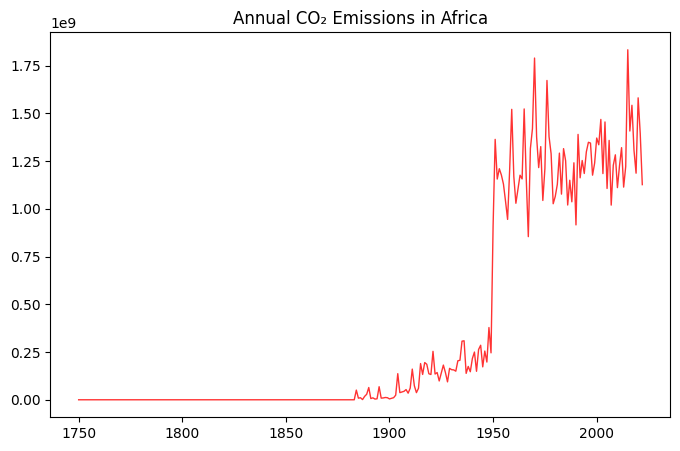

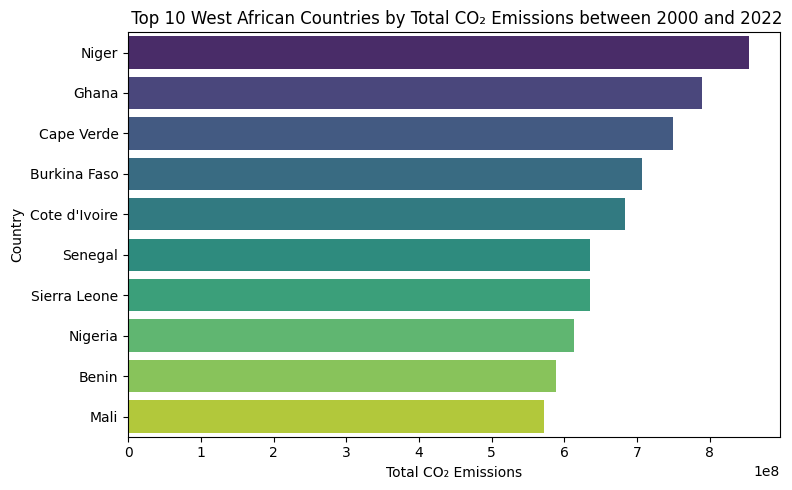

In [33]:
# Standard list of African countries
standard_african_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
    'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
    "Cote d'Ivoire",'Democratic Republic of Congo', 'Republic of Congo',
    'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini',
    'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
    'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali',
    'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
    'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles',
    'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan',
    'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
]

# Find which African countries are actually present in your dataset
africa_in_dataset = [country for country in standard_african_countries if country in countries]
display(africa_in_dataset)

data_africa = data[(data['Entity'].isin(africa_in_dataset))] 
africa_emissions = data_africa.groupby('Year')['Annual CO₂ emissions (per capita)'].sum()

plt.figure(figsize = (8, 5))
plt.plot(africa_emissions.index, africa_emissions.values, color ='red', alpha=0.8, linewidth=1)
plt.title('Annual CO₂ Emissions in Africa')

west_african_countries = [
    'Nigeria', 'Ghana', 'Senegal', "Cote d'Ivoire", 'Mali', 'Burkina Faso',
    'Niger', 'Togo', 'Benin', 'Guinea', 'Sierra Leone', 'Liberia', 'Gambia', 'Cape Verde'
]

data_west_africa = data[(data['Entity'].isin(west_african_countries)) & (data['Year'] >= 2000)]
data_total_emissions = data_west_africa.groupby('Entity')['Annual CO₂ emissions (per capita)'].sum().reset_index()
data_top_10 = data_total_emissions.sort_values(by='Annual CO₂ emissions (per capita)', ascending=False).head(10)
display(data_top_10)

plt.figure(figsize=(8,5))
sns.barplot(data=data_top_10, x='Annual CO₂ emissions (per capita)', y='Entity', palette='viridis')
plt.title(' Top 10 West African Countries by Total CO₂ Emissions between 2000 and 2022')
plt.xlabel('Total CO₂ Emissions')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
